# Compare the performance of models (loss/accuracy, latency)

The models to compare will  be:
* ResNet18
* ResNet50
* VGG16 - Takes a long time to train
* MobileNetV3 - small
* MobileNetV3 - large
* EfficientNet

In [29]:
from pathlib import Path
import pandas as pd

from utils import *
from dataloaders import *
from data_preparation import *
from allResNets import *
from VGGs import *
from MobileNetV3 import *
from engine import *
from efficientNet import *

change_to_disk()
data_dir = Path("clean_split_1k/")
models_path = Path('Models/')
saves = Path('Trainning_results_saves/')

In [2]:
data_transform = transforms.Compose([
    # Resize our images to 224x224
    transforms.Resize(size=(224, 224)),
    
    # Rotate the images randomly (just to make it as independent from the position of the pipeline)
    transforms.RandomRotation(180),

    # Random crop
    transforms.RandomCrop(140),

    #Random horizontal flip
    transforms.RandomHorizontalFlip(p=0.5),

    # Turn the image into a torch.Tensor
    transforms.ToTensor(),

    # Normalize
    transforms.Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
])

BATCH_SIZE = 32
train_dl, validation_dl, test_dl, train_data, validation_data, test_data, class_names = create_dataloaders(data_dir, data_transform, batch_size = BATCH_SIZE)

In [3]:
# Things to play with
# Hyperparameters -> NUM_EPOCHS - 100 | Learning_rate - 0.001 
# Functions -> Optimizer - Rprop | Loss Function - Cross Entropy Loss

NUM_EPOCHS = 100
lr = 0.001
device = get_device()

resnet18 = ResNet18()
resnet50 = ResNet50()
mobnet_sml = MobileNetV3("small")
mobnet_lrg = MobileNetV3("large")
# effnetb0 = EfficientNetB0()
# effnetb5 = EfficientNetB5()


loss_fn = nn.CrossEntropyLoss()

In [4]:
#Train ResNet18
resnet18.to(device)
nadam_optim = torch.optim.NAdam(params=resnet18.parameters(), lr=lr)
train_resnet18_results, train_time_resnet18 = train(resnet18, train_dl, validation_dl, optimizer=nadam_optim, loss_fn=loss_fn, epochs=NUM_EPOCHS, device=device)

  0%|          | 0/100 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 0.7715 | train_acc: 0.6492 | validation_loss: 0.7853 | validation_acc: 0.6613
Epoch: 2 | train_loss: 0.5704 | train_acc: 0.7432 | validation_loss: 0.4705 | validation_acc: 0.7883
Epoch: 3 | train_loss: 0.5135 | train_acc: 0.7598 | validation_loss: 1.0637 | validation_acc: 0.5879
Epoch: 4 | train_loss: 0.5028 | train_acc: 0.7745 | validation_loss: 3.1298 | validation_acc: 0.4922
Epoch: 5 | train_loss: 0.4869 | train_acc: 0.7835 | validation_loss: 1.8007 | validation_acc: 0.5391
Epoch: 6 | train_loss: 0.4369 | train_acc: 0.8020 | validation_loss: 0.8989 | validation_acc: 0.6465
Epoch: 7 | train_loss: 0.4051 | train_acc: 0.8153 | validation_loss: 0.9724 | validation_acc: 0.6074
Epoch: 8 | train_loss: 0.3770 | train_acc: 0.8220 | validation_loss: 1.0486 | validation_acc: 0.6613
Epoch: 9 | train_loss: 0.3733 | train_acc: 0.8313 | validation_loss: 1.2963 | validation_acc: 0.6230
Epoch: 10 | train_loss: 0.3666 | train_acc: 0.8285 | validation_loss: 0.6386 | validation_a

In [5]:
eval_resnet18_results = eval_model(resnet18, test_dl, loss_fn = loss_fn, accuracy_fn=accuracy_fn, device = device, dummy_input= torch.rand(32,3,224,224).to(device))

  0%|          | 0/16 [00:02<?, ?it/s]

In [6]:
#Train ResNet50
resnet50.to(device)
nadam_optim = torch.optim.NAdam(params=resnet50.parameters(), lr=lr)
train_resnet50_results, train_time_resnet50 = train(resnet50, train_dl, validation_dl, optimizer=nadam_optim, loss_fn=loss_fn, epochs=NUM_EPOCHS, device=device)

  0%|          | 0/100 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 0.9695 | train_acc: 0.5980 | validation_loss: 0.9531 | validation_acc: 0.5941
Epoch: 2 | train_loss: 0.6458 | train_acc: 0.7037 | validation_loss: 0.8563 | validation_acc: 0.6355
Epoch: 3 | train_loss: 0.5571 | train_acc: 0.7362 | validation_loss: 1.1625 | validation_acc: 0.5770
Epoch: 4 | train_loss: 0.5132 | train_acc: 0.7632 | validation_loss: 1.6005 | validation_acc: 0.5625
Epoch: 5 | train_loss: 0.4925 | train_acc: 0.7792 | validation_loss: 0.7243 | validation_acc: 0.7844
Epoch: 6 | train_loss: 0.4479 | train_acc: 0.7977 | validation_loss: 0.6687 | validation_acc: 0.6883
Epoch: 7 | train_loss: 0.4268 | train_acc: 0.7987 | validation_loss: 3.1158 | validation_acc: 0.4531
Epoch: 8 | train_loss: 0.4322 | train_acc: 0.7983 | validation_loss: 0.5927 | validation_acc: 0.7730
Epoch: 9 | train_loss: 0.4171 | train_acc: 0.8073 | validation_loss: 0.6668 | validation_acc: 0.6883
Epoch: 10 | train_loss: 0.4055 | train_acc: 0.8157 | validation_loss: 0.6316 | validation_a

In [7]:
eval_resnet50_results = eval_model(resnet50, test_dl, loss_fn = loss_fn, accuracy_fn=accuracy_fn, device = device, dummy_input = torch.rand(32,3,224,224).to(device))

  0%|          | 0/16 [00:02<?, ?it/s]

In [8]:
#Train MobileNet Large
mobnet_lrg.to(device)
nadam_optim = torch.optim.NAdam(params=mobnet_lrg.parameters(), lr=lr)
train_mobnet_lrg_results, train_time_mobnet_lrg = train(mobnet_lrg, train_dl, validation_dl, optimizer=nadam_optim, loss_fn=loss_fn, epochs=NUM_EPOCHS, device=device)

  0%|          | 0/100 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 0.8841 | train_acc: 0.5980 | validation_loss: 0.8458 | validation_acc: 0.6371
Epoch: 2 | train_loss: 0.6887 | train_acc: 0.6750 | validation_loss: 0.7295 | validation_acc: 0.5840
Epoch: 3 | train_loss: 0.6099 | train_acc: 0.7218 | validation_loss: 0.5658 | validation_acc: 0.7633
Epoch: 4 | train_loss: 0.5671 | train_acc: 0.7362 | validation_loss: 0.5255 | validation_acc: 0.7438
Epoch: 5 | train_loss: 0.5266 | train_acc: 0.7580 | validation_loss: 0.4728 | validation_acc: 0.7922
Epoch: 6 | train_loss: 0.5382 | train_acc: 0.7562 | validation_loss: 10.0403 | validation_acc: 0.5582
Epoch: 7 | train_loss: 0.5056 | train_acc: 0.7658 | validation_loss: 0.5451 | validation_acc: 0.7984
Epoch: 8 | train_loss: 0.4717 | train_acc: 0.7815 | validation_loss: 0.4778 | validation_acc: 0.8039
Epoch: 9 | train_loss: 0.6614 | train_acc: 0.7265 | validation_loss: 0.5469 | validation_acc: 0.7676
Epoch: 10 | train_loss: 0.4624 | train_acc: 0.7915 | validation_loss: 0.6781 | validation_

In [9]:
eval_mobnet_lrg_results = eval_model(mobnet_lrg, test_dl, loss_fn = loss_fn, accuracy_fn=accuracy_fn, device = device, dummy_input= torch.rand(32,3,224,224).to(device))

  0%|          | 0/16 [00:03<?, ?it/s]

In [10]:
#Train MobileNet Small
mobnet_sml.to(device)
nadam_optim = torch.optim.NAdam(params=mobnet_sml.parameters(), lr=lr)
train_mobnet_sml_results, train_time_mobnet_sml = train(mobnet_sml, train_dl, validation_dl, optimizer=nadam_optim, loss_fn=loss_fn, epochs=NUM_EPOCHS, device=device)

  0%|          | 0/100 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 0.8579 | train_acc: 0.5950 | validation_loss: 0.9356 | validation_acc: 0.5945
Epoch: 2 | train_loss: 0.6457 | train_acc: 0.6975 | validation_loss: 0.5759 | validation_acc: 0.7520
Epoch: 3 | train_loss: 0.5974 | train_acc: 0.7105 | validation_loss: 0.7899 | validation_acc: 0.6125
Epoch: 4 | train_loss: 0.5358 | train_acc: 0.7522 | validation_loss: 0.6856 | validation_acc: 0.7371
Epoch: 5 | train_loss: 0.4988 | train_acc: 0.7638 | validation_loss: 0.6572 | validation_acc: 0.6789
Epoch: 6 | train_loss: 0.5262 | train_acc: 0.7712 | validation_loss: 0.4660 | validation_acc: 0.7723
Epoch: 7 | train_loss: 0.4709 | train_acc: 0.7830 | validation_loss: 0.6210 | validation_acc: 0.6730
Epoch: 8 | train_loss: 0.5083 | train_acc: 0.7855 | validation_loss: 0.5078 | validation_acc: 0.7805
Epoch: 9 | train_loss: 0.4496 | train_acc: 0.7880 | validation_loss: 0.5086 | validation_acc: 0.7645
Epoch: 10 | train_loss: 0.4243 | train_acc: 0.8033 | validation_loss: 0.6708 | validation_a

In [11]:
eval_mobnet_sml_results = eval_model(mobnet_sml, test_dl, loss_fn = loss_fn, accuracy_fn=accuracy_fn, device = device, dummy_input= torch.rand(32,3,224,224).to(device))

  0%|          | 0/16 [00:02<?, ?it/s]

(None, None)

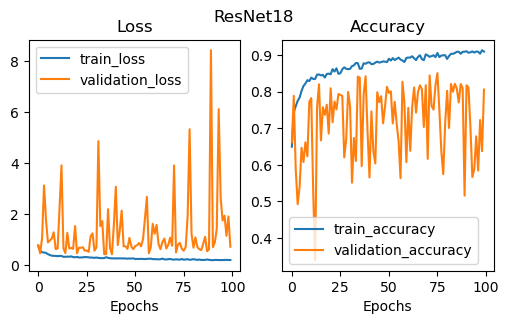

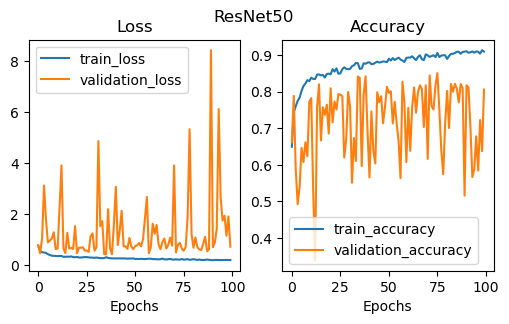

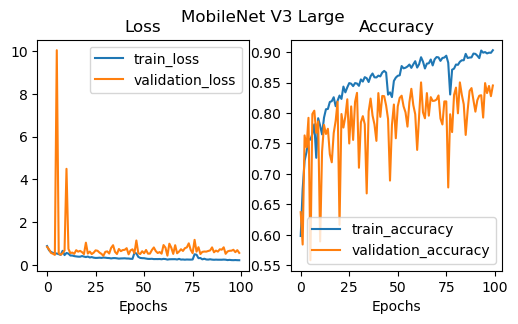

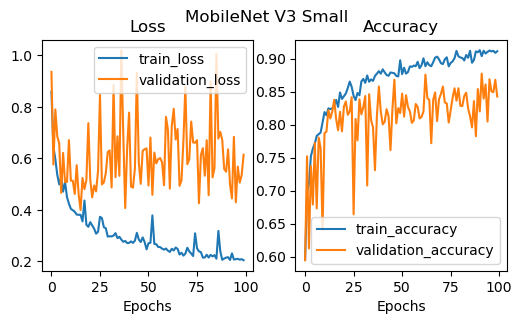

In [18]:
plot_loss_curves(train_resnet18_results,"ResNet18"), plot_loss_curves(train_resnet18_results,"ResNet50"),
plot_loss_curves(train_mobnet_lrg_results,"MobileNet V3 Large"), plot_loss_curves(train_mobnet_sml_results,"MobileNet V3 Small")
#plot_loss_curves(train_effnetb0_results,"EfficientNet B0"), plot_loss_curves(train_effnetb5_results,"EfficientNet B5"),

(None, None)

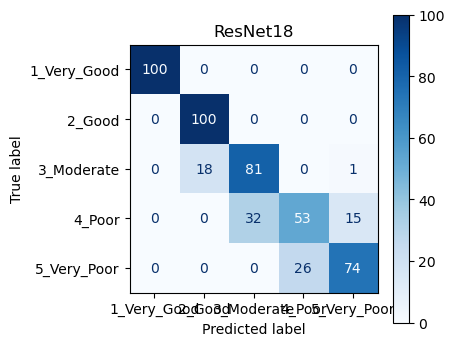

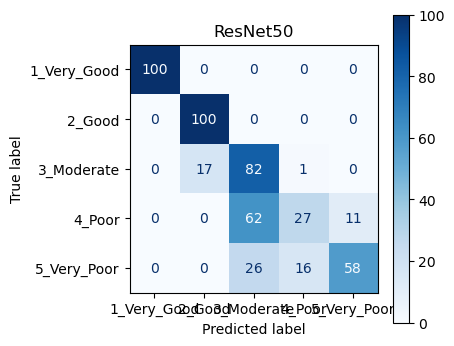

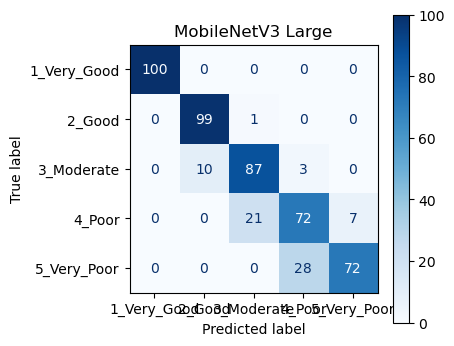

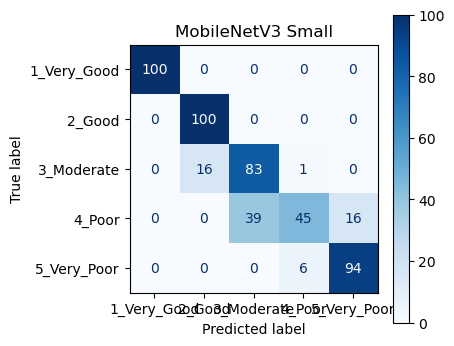

In [19]:
plot_confusion_matrix(resnet18,test_dl,device,class_names, "ResNet18"), plot_confusion_matrix(resnet50, test_dl, device, class_names, "ResNet50"),
plot_confusion_matrix(mobnet_lrg, test_dl, device, class_names, "MobileNetV3 Large"), plot_confusion_matrix(mobnet_sml, test_dl, device, class_names, "MobileNetV3 Small")
#plot_confusion_matrix(effnetb0,test_dl,device,class_names, "EfficientNet B0"), plot_confusion_matrix(effnetb5, test_dl, device, class_names, "EfficientNet B5")


In [20]:
all_results = pd.DataFrame([
    eval_resnet18_results,
    eval_resnet50_results,
    eval_mobnet_sml_results,
    eval_mobnet_lrg_results,
    #eval_effnetb0_results,
    #eval_effnetb5_results
    ])

In [21]:
all_results['train_time'] = pd.DataFrame([
    train_time_resnet18,
    train_time_resnet50,
    train_time_mobnet_lrg,
    train_time_mobnet_sml,
    #train_time_effnetb0,
    #train_time_effnetb5
])

In [22]:
all_results

,model_name,model_loss,model_acc,model_inf_time,train_time
0,ResNet,0.766978,81.445312,24.068606,9092.867186
1,ResNet,1.017365,72.929688,52.475776,9879.035368
2,MobileNetV3,0.822920,83.710938,21.499968,9975.220580
3,MobileNetV3,0.542391,84.179688,31.142336,8363.080526


In [26]:
# model_name_resnet18 = 'ResNet18_1000_class_100_epoch.pth'
# model_name_resnet50 = 'ResNet50_1000_class_100_epoch.pth'
# model_name_mobnet_lrg = 'Mobnet_lrg_1000_class_100_epoch.pth'
# model_name_mobnet_sml = 'Mobnet_sml_1000_class_100_epoch.pth'
# model_name_effnetb0 = 'EffNet_B0_1000_class_100_epoch.pth'
# model_name_effnetb5 = 'EffNet_B5_1000_class_100_epoch.pth'

# save_model(models_path, model_name_resnet18, resnet18)
# save_model(models_path, model_name_resnet50, resnet50)
# save_model(models_path, model_name_mobnet_lrg, mobnet_lrg)
# save_model(models_path, model_name_mobnet_sml, mobnet_sml)
# #save_model(models_path, model_name_effnetb0, effnetb0)
# #save_model(models_path, model_name_effnetb5, effnetb5)

# resnet18_all_results = [eval_resnet18_results, train_resnet18_results, train_time_resnet18]
# resnet50_all_results = [eval_resnet50_results, train_resnet50_results, train_time_resnet50]
# mobnet_lrg_all_results = [eval_mobnet_lrg_results, train_mobnet_lrg_results, train_time_mobnet_lrg]
# mobnet_sml_all_results = [eval_mobnet_sml_results, train_mobnet_sml_results, train_time_mobnet_sml]
# #effnetb0_all_results = [eval_effnetb0_results, train_effnetb0_results, train_time_effnetb0]
# #effnetb5_all_results = [eval_effnetb5_results, train_effnetb5_results, train_time_effnetb5]

# name_results_resnet18 = 'resnet18_results.npy'
# name_results_resnet50 = 'resnet50_results.npy'
# name_results_mobnet_lrg = 'mobnet_lrg_results.npy'
# name_results_mobnet_sml = 'mobnet_sml_results.npy'
# name_results_effnetb0 = 'effnetb0_results.npy'
# name_results_effnetb5 = 'effnetb5_results.npy'

# pth = saves / name_results_resnet18
# np.save(pth,resnet18_all_results)

# pth = saves / name_results_resnet50
# np.save(pth,resnet50_all_results)

# pth = saves / name_results_mobnet_lrg
# np.save(pth,mobnet_lrg_all_results )

# pth = saves / name_results_mobnet_sml
# np.save(pth,mobnet_sml_all_results)

# # pth = saves / name_results_effnetb0
# # np.save(pth,effnetb0_all_results )

# # pth = saves / name_results_effnetb5
# # np.save(pth,effnetb5_all_results )

Saving the model to: Models\ResNet18_1000_class_100_epoch.pth
Saving the model to: Models\ResNet50_1000_class_100_epoch.pth
Saving the model to: Models\Mobnet_lrg_1000_class_100_epoch.pth
Saving the model to: Models\Mobnet_sml_1000_class_100_epoch.pth
